In [1]:
import sys
from optparse import OptionParser

from dynesty import plotting as dyplot
from dynesty import utils as dyfunc


import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.stats.mstats import mquantiles

plt.rcParams['xtick.labelsize']= 12
plt.rcParams['ytick.labelsize']= 12

import pickle
import os
import json

from jampy.mge_half_light_isophote import mge_half_light_isophote
from astropy import units as u


from util import quantities2D, quantities3D
from dyLens.utils.tools import effective_einstein_radius_from_kappa
from dyLens.utils import Analysis

In [8]:
result_path = "/home/carlosmelo/Documents/GitHub/TaleI/451938/model1/bigger/shear/dyLens/phase5/"
phase_name = "phase5"

In [9]:
# Load sampler, phase and model of dyLens
with open(result_path+'/Final_sampler_{}.pickle'.format(phase_name),'rb') as f:
    sampler = pickle.load(f)
    f.close()
    try:
        sampler = sampler["sampler"]
    except:
        sampler = sampler

with open(result_path+'/{}.pickle'.format(phase_name),'rb') as f:
    phase = pickle.load(f)
    f.close()

with open(result_path+'/CombinedModel_{}.pickle'.format(phase_name),'rb') as f:
    CM = pickle.load(f)
    f.close()

with open(result_path+'/priors_{}.pickle'.format(phase_name),'rb') as f:
    priors = pickle.load(f)
    f.close()

In [20]:
A = Analysis.Analysis(sampler=sampler, 
                                dyLens_phase=phase, ncores=8)

Initializing dyLens analysis.
####################################

Summary
nlive: 500
niter: 4279
ncall: 53555
eff(%):  8.924
logz: 4094.829 +/-  0.150

Fiducial values and 68% confidence level.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters Updated!
An exception ocurres in Pyautolens_figure_of_merit().


In [36]:
A.phase.parsSource["inner_coefficient"] += 0.00022950206685413507

In [37]:
A.Fiducial_source_galaxy(A.parsFiducial)

In [38]:
A.phase.CombinedModel.source_model.regularization.inner_coefficient

1.0004690042337083

Generating lensing results. This could take a while.


ValueError: array must not contain infs or NaNs

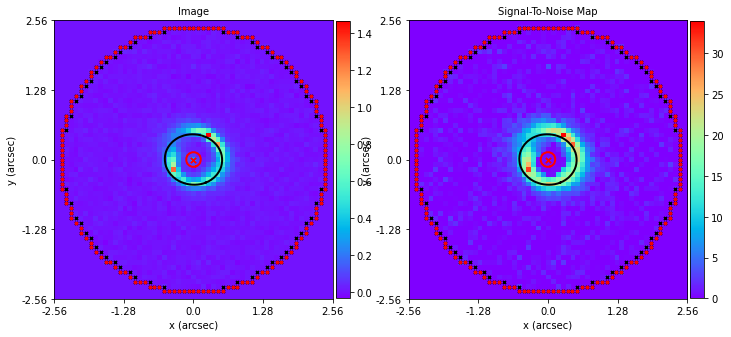

In [39]:
A.LensFiducial()